## <center>Heart Attack Analysis & Prediction</center>

##Introduction:
The objective of this project is to undertake a comprehensive analysis of a dataset containing pertinent information relating to heart attack occurrences. Through the construction of a predictive model, the intent is to ascertain the probability of heart attack incidence based on parameters such as age, gender, chest pain type, blood pressure, cholesterol levels, and other associated factors. This investigation aims to elucidate the complex interplay between these factors and the occurrence of heart attacks, thereby contributing to early detection and prevention methodologies.



## Learing outcomes from this project
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
   


<a id="1"></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [79]:
#import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## Data Content
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **target:** 0= less chance of heart attack 1= more chance of heart attack

<a id="3"></a>
## Read and Analyse Data
* In this section, we read heart.csv

In [80]:
# read data
df = pd.read_csv("/content/heart.csv")

In [81]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [83]:
# information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="4"></a>
## Missing Value Analysis

In [84]:
# missing value
df.isnull().sum().sum()

0

<a id="5"></a>
## Unique Value Analysis

In [85]:
for i in df.columns:
    print(f"{i} -- {df[i].value_counts().shape[0]}")

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id="6"></a>
## Categorical Feature Analysis

In [86]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car

In [87]:
help(grab_col_names)

Help on function grab_col_names in module __main__:

grab_col_names(dataframe, cat_th=10, car_th=20)



In [88]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f'cat_cols: {len(cat_cols)}')
print(f'num_cols: {len(num_cols)}')
print(f'cat_but_car: {len(cat_but_car)}')
print(f'num_but_cat: {len([col for col in cat_cols if col in num_cols])}')


Observations: 303
Variables: 14
cat_cols: 9
num_cols: 5
cat_but_car: 0
num_but_cat: 0


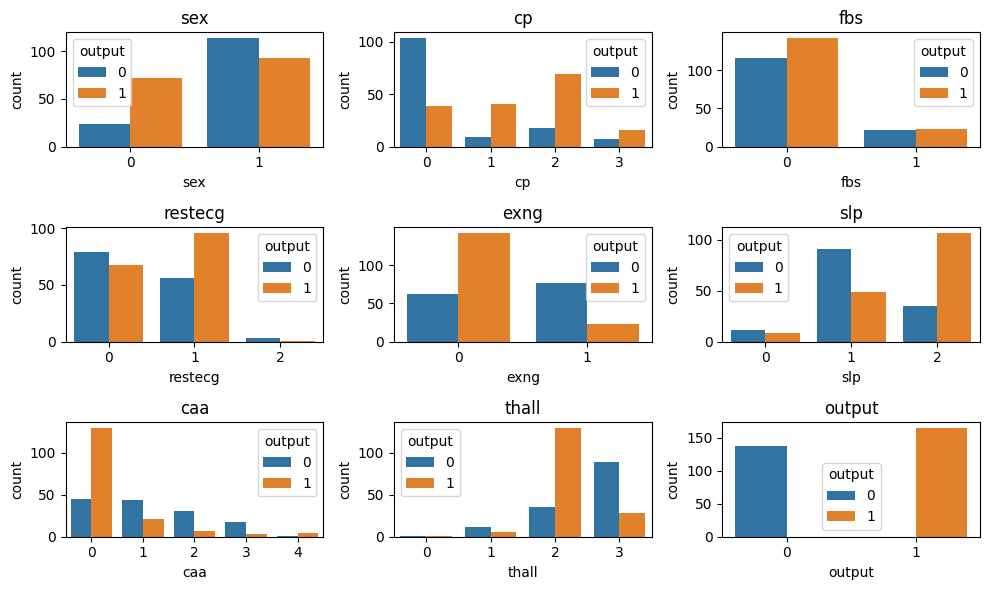

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
df_categoric = df.loc[:, cat_cols]

# Set the dimensions for the plots
fig_width = 10  # Width of the figure
fig_height = 6  # Height of the figure

# Calculate the number of rows and columns needed for the grid
num_rows = 3
num_cols = 3
num_plots = min(len(cat_cols), num_rows * num_cols)

# Create subplots with the desired grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

# Loop through categorical columns and create count plots
for i in range(num_plots):
    sns.countplot(x=cat_cols[i], data=df_categoric, hue="output", ax=axes[i])
    axes[i].set_title(cat_cols[i])

    # Save the plot with custom dimensions
    plt.savefig(f"{cat_cols[i]}_countplot.png", dpi=300, bbox_inches="tight")  # Adjust dpi and bbox_inches as needed

# Adjust layout spacing
plt.tight_layout()

# Display the plots
plt.show()


<a id="7"></a>
## Numeric Feature Analysis
* Bivariate data analysis with scatter plot

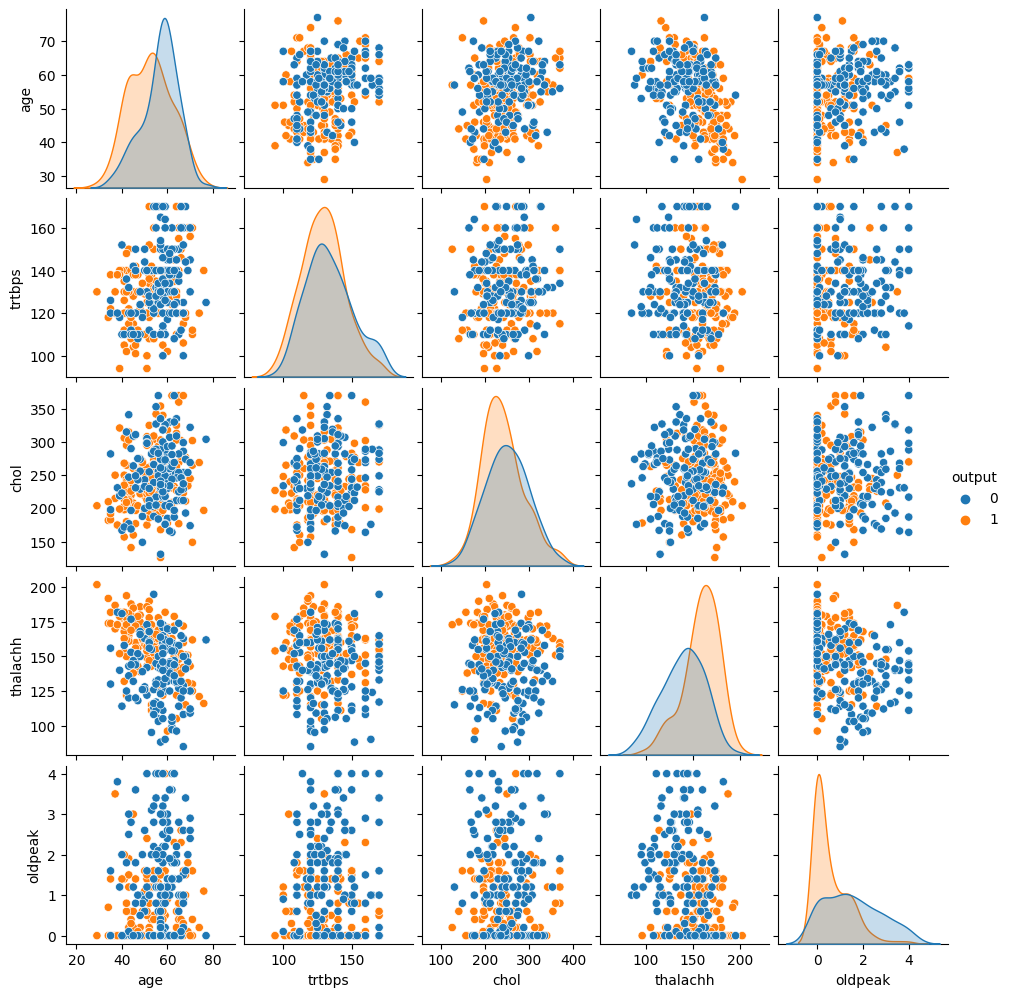

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dimensions for the output graph
graph_height = 10  # Height of the graph
graph_width = 10   # Width of the graph

# Select numeric columns
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']
df_numeric = df.loc[:, num_cols]

# Create the pair plot
g = sns.pairplot(df_numeric, hue="output", diag_kind="kde")

# Set the dimensions of the graph
g.fig.set_figheight(graph_height)
g.fig.set_figwidth(graph_width)

# Display the graph
plt.show()


* There are numeric values in the row and column. Orange and gray dots show output.

* If we look at the intersection of the Oldpeak variable, there is a left slant, which means positive skewness.
* Thalacahm, on the other hand, has negative skewness as it is tilted to the right.

* We can comment on the correlation by looking at the distribution of the numerical variables in the table with each other.

* If the image of the dots looks round, it is understood that there is no correlation.

<a id="8"></a>
## Standardization

* Standardization is the process of scaling data and rescaling the values in a data set according to a specific mean and standard deviation. This process is necessary to make accurate comparisons between variables measured in different units.

* Having the features in the data set at the same scale helps the model to give more accurate results.

In [91]:
scaler = StandardScaler()
scaler

StandardScaler()

In [92]:
scaled_array = scaler.fit_transform(df[num_cols[:-1]])

In [93]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [94]:
pd.DataFrame(scaled_array).describe().T

,count,mean,std,min,25%,50%,75%,max
0,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
1,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
2,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
3,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
4,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


<a id="9"></a>
## Box Plot Analysis

In [95]:
df_dummy = pd.DataFrame(scaled_array, columns = num_cols[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [96]:
df_dummy = pd.concat([df_dummy, df.loc[:,"output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [97]:
data_melted = pd.melt(df_dummy,
                      id_vars = "output",
                      var_name = "features",
                      value_name = "value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


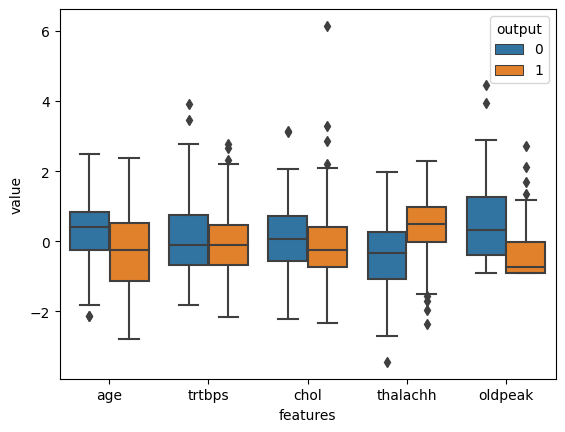

In [98]:
# box.plot
plt.figure()
sns.boxplot(x = "features",
            y = "value",
            hue = "output",
            data = data_melted)
plt.show()

* You can see outliers with boxplot visualization


<a id="10"></a>
## Swarm Plot Analysis

* Swarm plot analysis is used to visualize the distribution and density of data.

* This type of chart is especially useful in small datasets and helps to easily detect outliers in the dataset thanks to its point distribution. Moreover, the swarm plot can also be used to visualize relationships between different groups in the dataset.

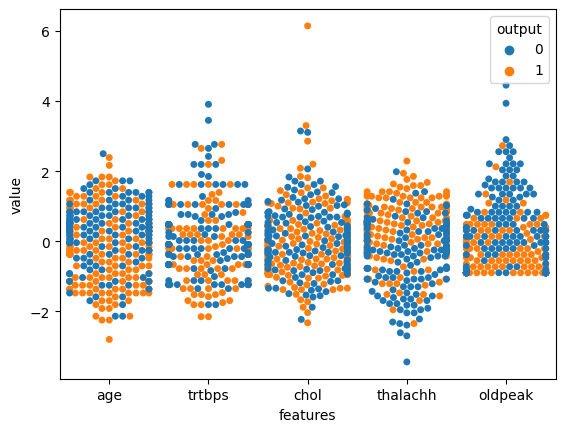

In [99]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features",
              y = "value",
              hue = "output",
              data= data_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis

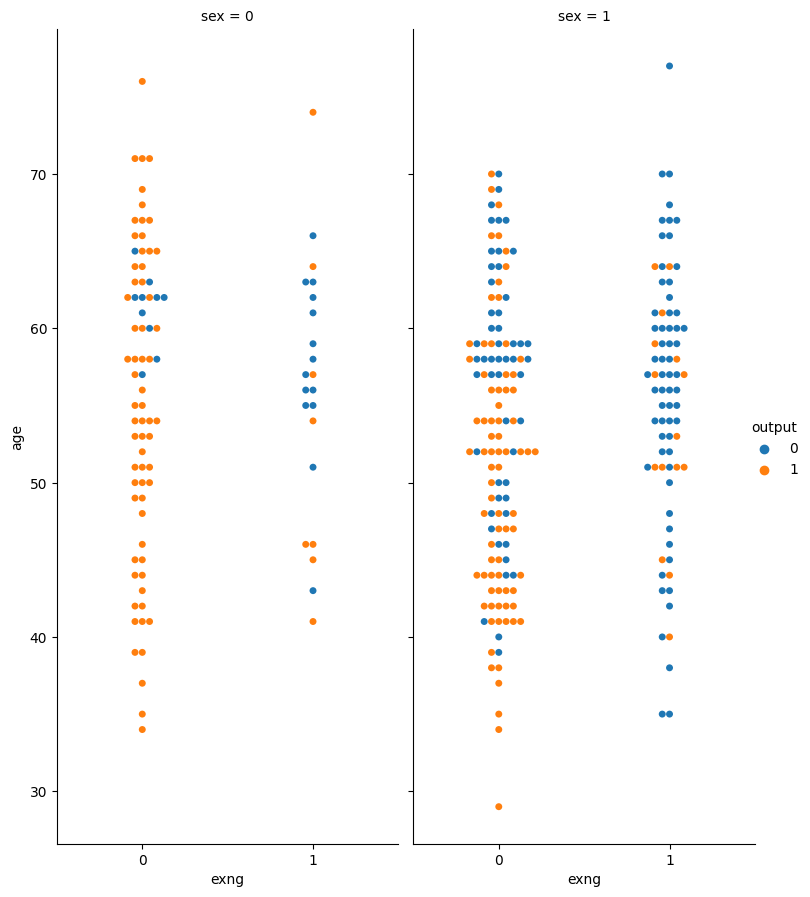

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dimensions for the output graph
graph_height = 10  # Height of the graph
graph_width = 8   # Width of the graph

# Create the catplot with a swarm plot
g = sns.catplot(x="exng", y="age", hue="output", col="sex", kind="swarm", data=df)

# Set the dimensions of the graph
g.fig.set_figheight(graph_height)
g.fig.set_figwidth(graph_width)

# Display the graph
plt.show()


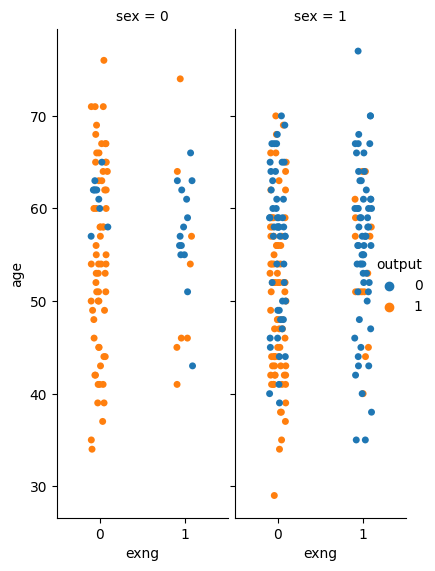

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dimensions for the output graph
graph_height = 6  # Height of the graph
graph_width = 4   # Width of the graph

# Create the catplot
g = sns.catplot(x="exng", y="age", hue="output", col="sex", kind="strip", data=df)

# Set the dimensions of the graph
g.fig.set_figheight(graph_height)
g.fig.set_figwidth(graph_width)

# Display the graph
plt.show()


* Strip plot and swarm plot are both charts used to visualize the relationship of a categorical variable to a numerical variable. However, a strip plot displays data on only one line, while a swarm plot displays data as overlapped points.

* A swarm plot is similar to a strip plot, but its points are offset so that the data can be better viewed, thus avoiding overlapping of the data.

* Therefore, the swarm plot can be better read and help better understand the data. However, for large datasets the strip plot may be faster and more convenient because the swarm plot takes up more space and requires more computation.

<a id="12"></a>
## Correlation Analysis

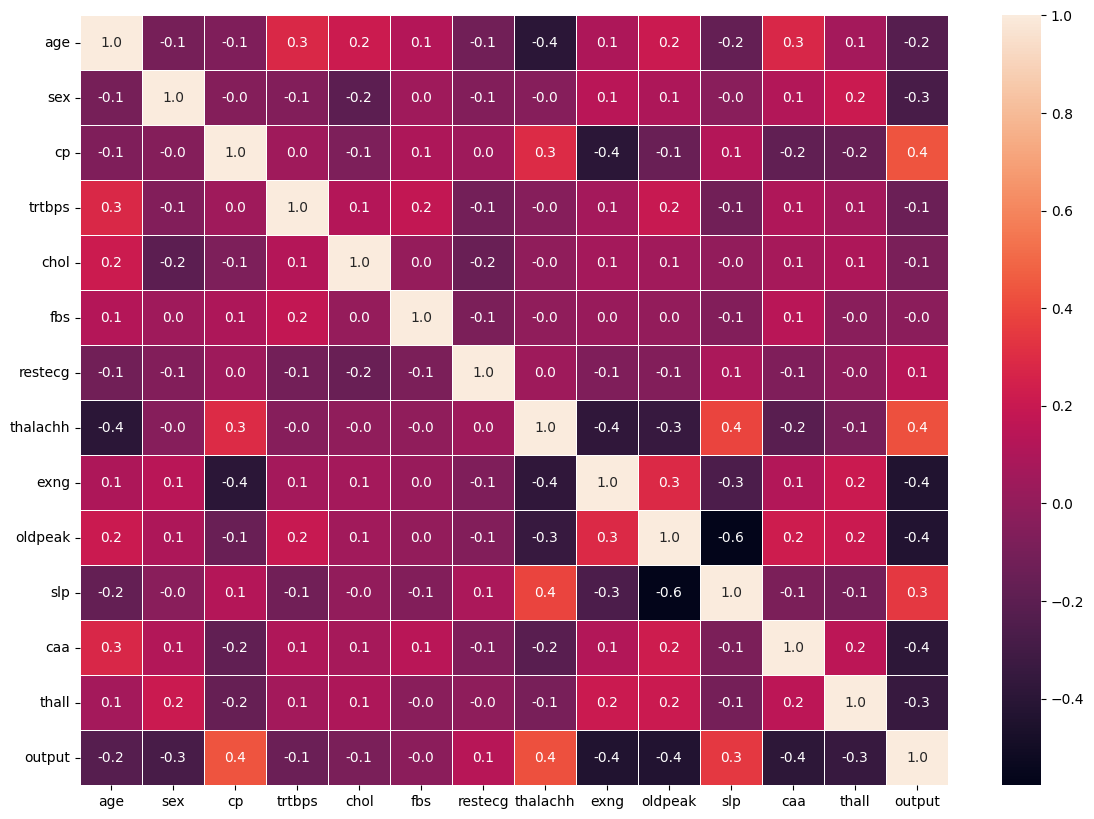

In [102]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outliers can disrupt ML process.

In [103]:
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [104]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "output")


(-1.5, 2.5)

* Write a function that prints true if there is an outlier between numeric variables and false otherwise.

In [105]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [106]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
trtbps True
chol True
thalachh True
oldpeak True
output False


* Let's write a function that finds outliers themselves.
* If we want to see the index if there is an outlier, we can do this by typing inplace = true.

In [107]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "output")



Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


In [108]:
grab_outliers(df,"oldpeak","True")

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
101   59    1   3     178   270    0        0       145     0      4.2    0   
204   62    0   0     160   164    0        0       145     0      6.2    0   
221   55    1   0     140   217    0        1       111     1      5.6    0   
250   51    1   0     140   298    0        1       122     1      4.2    1   
291   58    1   0     114   318    0        2       140     0      4.4    0   

     caa  thall  output  
101    0      3       1  
204    3      3       0  
221    0      3       0  
250    3      3       0  
291    3      1       0  


Int64Index([101, 204, 221, 250, 291], dtype='int64')


## Re-Assignment with Threshold


In [109]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [110]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [111]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
trtbps True
chol True
thalachh True
oldpeak True


In [112]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [113]:

for col in num_cols:
    print(col, check_outlier(df, col))

age False
trtbps False
chol False
thalachh False
oldpeak False


* No more outliers. As you can see, the output of the code is "False".

<a id="14"></a>
## Modelling

In [114]:
df1 = df.copy()

### Encoding Categorical Columns

* Note : With get_dummies we can do both binary encoding and one-hot encoding.

In [115]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [116]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['cp', 'restecg', 'slp', 'caa', 'thall']

In [117]:
one_hot_encoder(df, ohe_cols).head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63.0,1,145,233.0,1,150.0,0,2.3,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37.0,1,130,250.0,0,187.0,0,3.5,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41.0,0,130,204.0,0,172.0,0,1.4,1,1,...,0,0,1,0,0,0,0,0,1,0
3,56.0,1,120,236.0,0,178.0,0,0.8,1,1,...,0,0,1,0,0,0,0,0,1,0
4,57.0,0,120,354.0,0,163.0,1,0.6,1,0,...,0,0,1,0,0,0,0,0,1,0


In [118]:
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

### Scaling

* StandardScaler is a preprocessing technique in Python used for standardizing the features of a dataset.
* It transforms the dataset such that its distribution has a mean of 0 and a standard deviation of 1. This transformation is applied independently to each feature in the dataset.

In [119]:
scaler = StandardScaler()
scaler

StandardScaler()

In [120]:
X[num_cols[:-1]] = scaler.fit_transform(X[num_cols[:-1]])
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,1,3,0.828728,-0.255601,1,0,0.013543,0,2.3,0,0,1
1,-1.915313,1,2,-0.077351,0.102487,0,1,1.641748,0,3.5,0,0,2
2,-1.474158,0,1,-0.077351,-0.866457,0,0,0.981665,0,1.4,2,0,2
3,0.180175,1,1,-0.681403,-0.192409,0,1,1.245698,0,0.8,2,0,2
4,0.290464,0,0,-0.681403,2.293143,0,1,0.585615,1,0.6,2,0,2


### Train/Test Split

In [121]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (242, 13)
X_test: (61, 13)
y_train: (242, 1)
y_test: (61, 1)


### Logistic Regression


* Logistic regression is a statistical method used to analyze a dataset in which there are one or more independent variables that determine an outcome.

* "The purpose of logistic regression is to model the relationship between the dependent and independent variables in a classification problem and create a linear model to predict the outcome. The predicted outcome is given as a probability value for each input feature, and classification is typically done by setting a threshold value."

In [122]:
log_model = LogisticRegression().fit(X, y)

In [123]:
# calculate probabilities
y_pred_prob = log_model.predict_proba(X_test)
y_pred_prob

array([[0.90932837, 0.09067163],
       [0.30402068, 0.69597932],
       [0.14673302, 0.85326698],
       [0.96691782, 0.03308218],
       [0.06153084, 0.93846916],
       [0.08668436, 0.91331564],
       [0.33340856, 0.66659144],
       [0.99633   , 0.00367   ],
       [0.99162306, 0.00837694],
       [0.44747627, 0.55252373],
       [0.23009388, 0.76990612],
       [0.87937745, 0.12062255],
       [0.12161242, 0.87838758],
       [0.93202173, 0.06797827],
       [0.01098522, 0.98901478],
       [0.05515683, 0.94484317],
       [0.01277611, 0.98722389],
       [0.89597293, 0.10402707],
       [0.99165682, 0.00834318],
       [0.97662473, 0.02337527],
       [0.30437068, 0.69562932],
       [0.98522381, 0.01477619],
       [0.78572826, 0.21427174],
       [0.27539788, 0.72460212],
       [0.0487346 , 0.9512654 ],
       [0.34005292, 0.65994708],
       [0.14059717, 0.85940283],
       [0.41768202, 0.58231798],
       [0.99268842, 0.00731158],
       [0.06794502, 0.93205498],
       [0.

In [124]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [125]:
y_test

,output
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [126]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.909328,0.090672,0
1,0.304021,0.695979,1
2,0.146733,0.853267,1
3,0.966918,0.033082,0
4,0.061531,0.938469,1


In [127]:
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

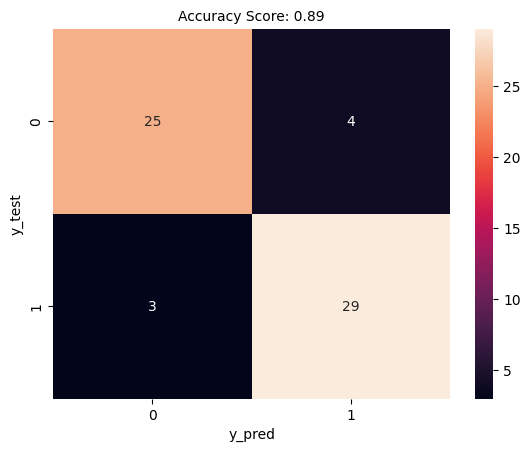

In [128]:
plot_confusion_matrix(y_test, y_pred)

In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Reciever Operating Characteristic Curve (ROC Curve)


In [130]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

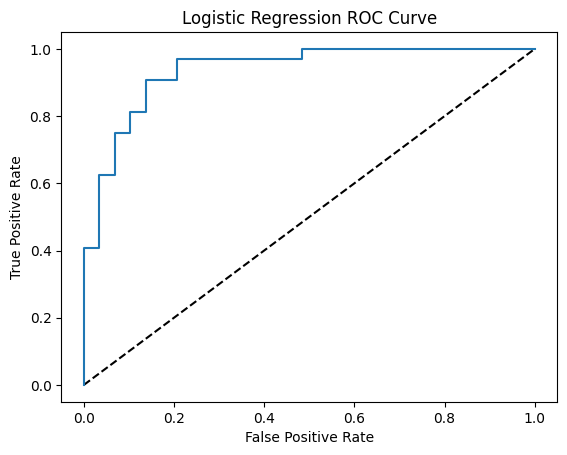

In [131]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [132]:
from sklearn.metrics import roc_auc_score

y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)


0.9249890206411945

##Conclusion
In this project, I created a computer program (a logistic regression model) to predict who might have heart disease. The result was a success, scoring 0.9249 on a scale that goes up to 1. This score shows that the program is excellent at telling the difference between people with heart disease and those without.

I started by looking at different health factors that might be linked to heart disease. Then, I used this information to build a model that could help doctors find and treat heart disease earlier.

The steps I took to prepare and analyze the data were key to making the model work well. Although the current model is effective, there's room to make it even better in the future by exploring other methods and making some adjustments.

Overall, this project highlights how computer technology, specifically machine learning, can be used in healthcare. It's a clear example of how these tools can be put into practical use to potentially save lives.